Shah Wali Ullah Baig

In [113]:
#import libraries

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = load_breast_cancer()

# Create a DataFrame
data = pd.DataFrame(df.data, columns=df.feature_names)

# Add the target variable to the DataFrame
data['target'] = df.target
target = data['target']

# Print target label and features label
print("Target labels:", data['target'].head())
print("\nFeatures labels:")
features = data.iloc[:,:-1]
features.head()

Target labels: 0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

Features labels:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Perform Naive Bayes classification
naive_bayes_model = GaussianNB()

# Fit your model
naive_bayes_model.fit(X_train, y_train)

# Perform prediction
y_pred = naive_bayes_model.predict(X_test)

In [115]:
print((y_test==0).sum())

43


In [116]:
# confusion matrix

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[40  3]
 [ 0 71]]


In [117]:
# Print classification report

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# print classification accuracy

classification_accuracy = accuracy_score(y_test, y_pred)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


# print classification error

classification_error = 1 - classification_accuracy
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision and Recall score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Classification accuracy : 0.9737
Classification error : 0.0263
Precision : 0.9595
Recall or Sensitivity : 1.0000


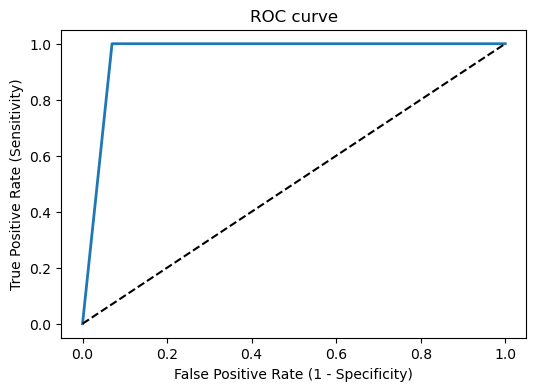

ROC AUC: 0.9651


In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(roc_auc))


In [120]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validated ROC AUC
cross_val_roc_auc = cross_val_score(naive_bayes_model,X_train, y_train, cv=cv, scoring='roc_auc').mean()

# Print cross-validated ROC AUC
print('Cross-validated ROC AUC: {:.4f}'.format(cross_val_roc_auc))

Cross-validated ROC AUC: 0.9868


In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [122]:
data = 'notebook_19_adult.csv'

df = pd.read_csv(data)

In [123]:
# View dimensions of the dataset
dimensions = df.shape
print('Dataset Dimensions:', dimensions)

# Preview the dataset
df.head()

Dataset Dimensions: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [124]:
#rename columns
# Rename columns
df = df.rename(columns={
    'educational-num': 'education_num',
    'marital-status': 'marital_status',
    'capital-gain': 'capital_gain',
    'capital-loss': 'capital_loss',
    'hours-per-week': 'hours_per_week',
    'native-country': 'native_country'
})

# Display the updated column names
print('Updated Column Names:\n', df.columns)

Updated Column Names:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [125]:
# Find categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Display the categorical variables
print('Categorical Variables:\n', categorical_variables)

Categorical Variables:
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')


In [126]:
# Check missing values in categorical variables
missing_categorical = df.select_dtypes(include=['object']).isnull().sum()
print('Missing Values in Categorical Variables:\n', missing_categorical)

# View frequency counts of values in categorical variables
for column in df.select_dtypes(include=['object']).columns:
    print(f'\nValue Counts for {column}:\n', df[column].value_counts())


Missing Values in Categorical Variables:
 workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
native_country    0
income            0
dtype: int64

Value Counts for workclass:
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Value Counts for education:
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Value Counts for marital_status:
 Married-civ-spouse      

In [127]:
# View frequency distribution of categorical variables
for column in df.select_dtypes(include=['object']).columns:
    print(f'\nFrequency Distribution for {column}:\n', df[column].value_counts(normalize=True))



Frequency Distribution for workclass:
 Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

Frequency Distribution for education:
 HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64

Frequency Distribution for marital_status:
 Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed       

In [128]:
# Check labels in 'workclass' variable
print('Labels in Workclass Variable:\n', df['workclass'].unique())

# Replace '?' values in 'workclass' variable with NaN
df['workclass'].replace('?', np.nan, inplace=True)

# Check frequency distribution of values in 'workclass' variable after replacing '?'
print('\nFrequency Distribution of Values in Workclass Variable:\n', df['workclass'].value_counts(normalize=True))

Labels in Workclass Variable:
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Frequency Distribution of Values in Workclass Variable:
 Private             0.736399
Self-emp-not-inc    0.083878
Local-gov           0.068110
State-gov           0.043025
Self-emp-inc        0.036813
Federal-gov         0.031101
Without-pay         0.000456
Never-worked        0.000217
Name: workclass, dtype: float64


In [129]:
# Check labels in 'occupation' variable
print('Labels in Occupation Variable:\n', df['occupation'].unique())

# Replace '?' values in 'occupation' variable with NaN
df['occupation'].replace('?', np.nan, inplace=True)

# Check frequency distribution of values in 'occupation' variable after replacing '?'
print('\nFrequency Distribution of Values in Occupation Variable:\n', df['occupation'].value_counts())


Labels in Occupation Variable:
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Frequency Distribution of Values in Occupation Variable:
 Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


In [130]:
# Check labels in 'native_country' variable
print('Labels in Native Country Variable:\n', df['native_country'].unique())

# Check frequency distribution of values in 'native_country' variable
print('\nFrequency Distribution of Values in Native Country Variable:\n', df['native_country'].value_counts())

# Replace '?' values in 'native-country' variable with NaN
df['native_country'].replace('?', np.nan, inplace=True)

# Again check the frequency distribution of values in 'native_country' variable after replacing '?'
print('\nFrequency Distribution of Values in Native Country Variable After Replacement:\n', df['native_country'].value_counts())

# Check for cardinality in categorical variables
cardinality = df.select_dtypes(include=['object']).nunique()
print('\nCardinality in Categorical Variables:\n', cardinality)


Labels in Native Country Variable:
 ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']

Frequency Distribution of Values in Native Country Variable:
 United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122


In [131]:
# Find numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# View the numerical variables
print('Numerical Variables:\n', numerical_variables)

# Display the numerical variables
numerical_data = df[numerical_variables]
print('\nNumerical Variables Data:\n', numerical_data)


Numerical Variables:
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

Numerical Variables Data:
        age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0       25  226802              7             0             0              40
1       38   89814              9             0             0              50
2       28  336951             12             0             0              40
3       44  160323             10          7688             0              40
4       18  103497             10             0             0              30
...    ...     ...            ...           ...           ...             ...
48837   27  257302             12             0             0              38
48838   40  154374              9             0             0              40
48839   58  151910              9             0             0              40
48840   22  201490              9             0  

In [132]:
numerical_data.shape

(48842, 6)

In [133]:
X = df.drop(['income'], axis=1)

y = df['income']

from sklearn.model_selection import train_test_split

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of X_train and X_test
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (39073, 14)
Shape of X_test: (9769, 14)


In [134]:
print(X_train[0:5])

       age         workclass  fnlwgt     education  education_num  \
37193   42           Private  145175  Some-college             10   
31093   52  Self-emp-not-inc  175029          10th              6   
33814   34         Local-gov  172664       HS-grad              9   
14500   28           Private  125791       HS-grad              9   
23399   46           Private   28419     Assoc-voc             11   

           marital_status         occupation   relationship   race  gender  \
37193  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
31093  Married-civ-spouse       Craft-repair        Husband  White    Male   
33814  Married-civ-spouse       Craft-repair        Husband  White    Male   
14500       Never-married       Adm-clerical  Not-in-family  White  Female   
23399       Never-married   Transport-moving  Not-in-family  White    Male   

       capital_gain  capital_loss  hours_per_week native_country  
37193             0             0              40

In [135]:
# Display categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns
print('Categorical Variables:\n', categorical_variables)

# Display numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns
print('\nNumerical Variables:\n', numerical_variables)


Categorical Variables:
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')

Numerical Variables:
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [136]:
# Print percentage of missing values in categorical variables in the training set
missing_categorical_percentage = (X_train.select_dtypes(include=['object']).isnull().sum() / len(X_train)) * 100
print('Percentage of Missing Values in Categorical Variables (Training Set):\n', missing_categorical_percentage)

# Print categorical variables with missing data
categorical_variables_with_missing = X_train[X_train.select_dtypes(include=['object']).columns].columns[X_train.select_dtypes(include=['object']).isnull().any()]
print('\nCategorical Variables with Missing Data (Training Set):\n', categorical_variables_with_missing)


Percentage of Missing Values in Categorical Variables (Training Set):
 workclass         5.794282
education         0.000000
marital_status    0.000000
occupation        5.817316
relationship      0.000000
race              0.000000
gender            0.000000
native_country    1.717298
dtype: float64

Categorical Variables with Missing Data (Training Set):
 Index(['workclass', 'occupation', 'native_country'], dtype='object')


In [137]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object for imputing missing values with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the training set
X_train_imputed = imputer_categorical.fit_transform(X_train.select_dtypes(include=['object']))

# Convert the imputed array back to a DataFrame
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.select_dtypes(include=['object']).columns)

# Display the DataFrame with imputed values
print('DataFrame with Imputed Values (Most Frequent) in Categorical Variables (Training Set):\n', X_train_imputed_df)


DataFrame with Imputed Values (Most Frequent) in Categorical Variables (Training Set):
               workclass     education         marital_status  \
0               Private  Some-college     Married-civ-spouse   
1      Self-emp-not-inc          10th     Married-civ-spouse   
2             Local-gov       HS-grad     Married-civ-spouse   
3               Private       HS-grad          Never-married   
4               Private     Assoc-voc          Never-married   
...                 ...           ...                    ...   
39068           Private       HS-grad  Married-spouse-absent   
39069           Private  Some-college     Married-civ-spouse   
39070           Private  Some-college               Divorced   
39071         State-gov     Assoc-voc              Separated   
39072           Private       Masters     Married-civ-spouse   

              occupation   relationship   race  gender native_country  
0      Machine-op-inspct        Husband  White    Male  United-States  

In [138]:
# Check missing values in categorical variables in X_train
missing_categorical_train = X_train.select_dtypes(include=['object']).isnull().sum()
print('Missing Values in Categorical Variables (Training Set):\n', missing_categorical_train)

# Check missing values in categorical variables in X_test
missing_categorical_test = X_test.select_dtypes(include=['object']).isnull().sum()
print('\nMissing Values in Categorical Variables (Testing Set):\n', missing_categorical_test)

# Check missing values in X_train
missing_values_train = X_train.isnull().sum()
print('\nMissing Values in X_train:\n', missing_values_train)

# Check missing values in X_test
missing_values_test = X_test.isnull().sum()
print('\nMissing Values in X_test:\n', missing_values_test)


Missing Values in Categorical Variables (Training Set):
 workclass         2264
education            0
marital_status       0
occupation        2273
relationship         0
race                 0
gender               0
native_country     671
dtype: int64

Missing Values in Categorical Variables (Testing Set):
 workclass         535
education           0
marital_status      0
occupation        536
relationship        0
race                0
gender              0
native_country    186
dtype: int64

Missing Values in X_train:
 age                  0
workclass         2264
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2273
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     671
dtype: int64

Missing Values in X_test:
 age                 0
workclass         535
fnlwgt              0
education           0
education_num       

In [139]:
# !pip install category_encoders

In [140]:
import category_encoders as ce

# Instantiate the OneHotEncoder from category_encoders
encoder = ce.OneHotEncoder(cols=X_train.select_dtypes(include=['object']).columns)

# Fit and transform the encoder on the training set
X_train_encoded = encoder.fit_transform(X_train)

# Transform the encoder on the testing set
X_test_encoded = encoder.transform(X_test)

# Display the encoded DataFrames
print('Encoded DataFrame (Training Set):\n', X_train_encoded)
print('\nEncoded DataFrame (Testing Set):\n', X_test_encoded)


Encoded DataFrame (Training Set):
        age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
37193   42            1            0            0            0            0   
31093   52            0            1            0            0            0   
33814   34            0            0            1            0            0   
14500   28            1            0            0            0            0   
23399   46            1            0            0            0            0   
...    ...          ...          ...          ...          ...          ...   
11284   36            1            0            0            0            0   
44732   34            1            0            0            0            0   
38158   28            1            0            0            0            0   
860     46            0            0            0            0            0   
15795   59            1            0            0            0            0   

       workclass

In [141]:
from sklearn.preprocessing import RobustScaler

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Scale numerical columns
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

print(X_train_scaled.shape, X_test_scaled.shape)

# Create DataFrames with scaled numerical columns and original categorical columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols)
X_train_scaled_df[categorical_cols] = X_train[categorical_cols]

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)
X_test_scaled_df[categorical_cols] = X_test[categorical_cols]

X_train_scaled_df.head()

print(X_train_scaled_df.shape, X_test_scaled_df.shape)

(39073, 6) (9769, 6)
(39073, 14) (9769, 14)


In [142]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [143]:
from sklearn.naive_bayes import CategoricalNB

# Replace GaussianNB with CategoricalNB
naive_bayes_model = CategoricalNB()

# Create a pipeline with the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', naive_bayes_model)])


In [144]:
X_test_scaled_df.shape

(9769, 14)

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

# Ensure the column names match the actual column names in your data
numeric_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']

# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a pipeline with the preprocessor and the classifier
naive_bayes_model = BernoulliNB()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', naive_bayes_model)])

# Fit the pipeline on the training data
pipeline.fit(X_train_scaled_df, y_train)

# Assuming X_test_scaled_df and y_test are defined
# Predict on the test set
X_test_transformed = preprocessor.transform(X_test_scaled_df)
y_pred = pipeline.predict(X_test_scaled_df)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix\n\n', cm)

# Extract individual values from the confusion matrix
tp = cm[0, 0]  # True Positives
tn = cm[1, 1]  # True Negatives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives

# Print individual values
print('\nTrue Positives(TP) = ', tp)
print('\nTrue Negatives(TN) = ', tn)
print('\nFalse Positives(FP) = ', fp)
print('\nFalse Negatives(FN) = ', fn)

Confusion matrix

 [[7080  399]
 [1469  821]]

True Positives(TP) =  7080

True Negatives(TN) =  821

False Positives(FP) =  399

False Negatives(FN) =  1469
